In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_035 processing* </span> 

In [2]:
path_to_fms = "E:/msc_data/ismrm_2025/dB0_035/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/dB0_035/fm/sim/D4_metrics"
#path_to_dmod_folder = "E:/msc_data/ismrm_2025/dB0_035/fm/sim/V1_dmod_sim" # No longer need to demodulate fieldmap

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [3]:
path_to_exp_meas = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\tests\test2_pro\B0.nii"
path_to_exp_dmod_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\cord_mask.nii.gz"
path_to_exp_metric_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\exp\cord_mask_labeled.nii.gz"

# For result save and loading
path_to_exp_dmod_fm = r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_dmod_B0_meas.nii.gz"
exp_B0_metrics_path =  r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_metrics.csv"

In [4]:
# Lets get the raw expiration data:
raw_exp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv"
extract_metrics(path_to_exp_meas, path_to_exp_dmod_mask, path_to_exp_metric_mask, raw_exp_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\tests\test2_pro\B0.nii -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\exp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv




In [4]:
# Import the data:
raw_exp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv"
raw_exp_metrics_csv = pd.read_csv(raw_exp_metrics_path)

raw_exp_metrics= raw_exp_metrics_csv['WA()'][::-1]

raw_exp_metrics 

10   -277.540653
9    -269.654259
8    -236.683647
7    -183.535555
6    -122.279939
5    -124.904195
4    -135.579613
3    -130.387474
2    -109.990501
1    -105.908986
0    -145.287181
Name: WA(), dtype: float64

In [5]:
central_freq_exp_35 = 123.249391
gamma_bar = 42.58 # MHz/T

B0_used_scanner = central_freq_exp_35 /gamma_bar
print("The B0 to use in the simulation should be: ", B0_used_scanner, "T")

The B0 to use in the simulation should be:  2.894537130108032 T


### <span style="color:red"> Inspiration </span> 

In [6]:
path_to_insp_meas = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\tests\test2_pro\B0.nii"
path_to_insp_dmod_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\cord_mask.nii.gz"
path_to_insp_metric_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\insp\cord_mask_labeled.nii.gz"

# For result save and loading
path_to_insp_dmod_fm = r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\insp_dmod_B0_meas.nii.gz"
insp_B0_metrics_path =  r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\insp_metrics_test.csv"

In [9]:
# Lets get the raw expiration data:
raw_insp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv"
extract_metrics(path_to_insp_meas, path_to_insp_dmod_mask, path_to_insp_metric_mask, raw_insp_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\tests\test2_pro\B0.nii -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\insp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv




In [6]:
raw_insp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv"
raw_insp_metrics_df = pd.read_csv(raw_insp_metrics_path)
raw_insp_metrics = raw_insp_metrics_df['WA()'][::-1]

raw_insp_metrics

10   -262.554534
9    -246.609818
8    -202.511716
7    -135.477820
6     -79.083717
5     -97.146527
4    -133.440034
3    -145.607452
2    -139.295199
1    -140.858648
0    -176.396718
Name: WA(), dtype: float64

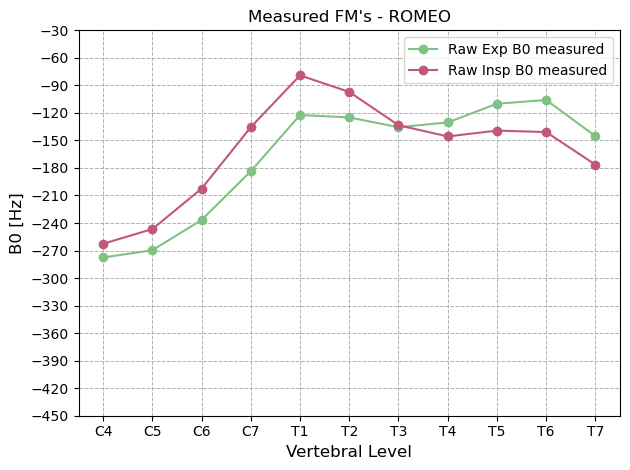

In [7]:
vertebrae_levels = [ 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#C1577B")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

yticks = range(-450, 0, 30) 
plt.yticks(yticks)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [8]:
path_to_avg_metrics = r"E:/msc_data/ismrm_2025/dB0_035/fm/C_dmod_meas/simple_avg_respiration.csv"

In [12]:
avg_respiration = (raw_exp_metrics+ raw_insp_metrics )/2
avg_respiration

10   -270.047594
9    -258.132039
8    -219.597682
7    -159.506688
6    -100.681828
5    -111.025361
4    -134.509823
3    -137.997463
2    -124.642850
1    -123.383817
0    -160.841949
Name: WA(), dtype: float64

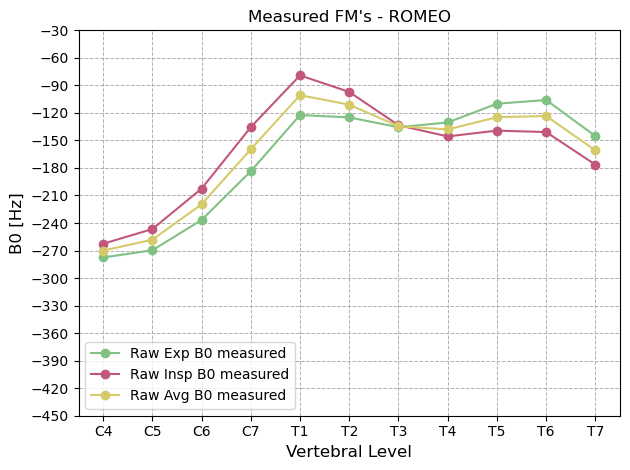

In [11]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "Raw Avg B0 measured", color = "#D5CB6A")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

yticks = range(-450, 0, 30)  
plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
# Export average!
avg_respiration.to_csv(path_to_avg_metrics , index = False, header = True)

### <span style="color:#81DDE7"> Simualted FM loading, calculations, extract metric and plot!  </span> 
Here we bring the data from the simulation with an initial assumption of chi value for trachea and lung </br>
This helps confirm the shape of the curves and the dimension of the graphs

In [25]:
from utils.cf_show_slice import display_nifti_slice
from convert_fm import convert_ppm_data_to_Hz_data
from extract_metric import extract_metrics
import re

In [9]:
path_to_abs_ref_fm_ppm = r"E:\msc_data\ismrm_2025\dB0_035\fm\sim\fms/db0_035_sim_fm_ppm.nii.gz"
path_to_ref_h20_fm_ppm = r"E:\msc_data\ismrm_2025\dB0_035\fm\sim\fms/custom_dmod_water_sim_fm_ppm.nii.gz"

In [10]:
path_to_abs_fm_metrics = r"E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/abs_sim_fm_ppm.csv"

In [20]:
extract_metrics(path_to_abs_ref_fm_ppm, path_to_dmod_mask, path_to_labeled_cord, path_to_abs_fm_metrics, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\sim\fms/db0_035_sim_fm_ppm.nii.gz -f E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/abs_sim_fm_ppm.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/abs_sim_fm_ppm.csv




In [11]:
abs_ref_fm_ppm_csv = pd.read_csv(path_to_abs_fm_metrics)
abs_ref_fm_ppm_data = abs_ref_fm_ppm_csv['WA()'][::-1]

abs_ref_fm_Hz_data = abs_ref_fm_ppm_data*central_freq_exp_35 # Central Frequency same for both expiration and inspiration
abs_ref_fm_Hz_data

10   -369.312604
9    -363.938357
8    -337.308862
7    -307.960226
6    -273.891931
5    -276.032047
4    -294.255358
3    -301.738131
2    -296.147987
1    -285.258325
0    -291.506679
Name: WA(), dtype: float64

In [12]:
path_to_abs_fm_Hz_metrics = r"E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/abs_sim_fm_Hz.csv"

In [24]:
abs_ref_fm_Hz_data.to_csv(path_to_abs_fm_Hz_metrics , index = False, header = True)

In [13]:
# Load abs ref fm Hz data
abs_ref_fm_Hz_csv = pd.read_csv(path_to_abs_fm_Hz_metrics)
abs_ref_fm_Hz_data = abs_ref_fm_Hz_csv
abs_ref_fm_Hz_data

,WA()
0,-369.312604
1,-363.938357
2,-337.308862
3,-307.960226
4,-273.891931
5,-276.032047
6,-294.255358
7,-301.738131
8,-296.147987
9,-285.258325


In [15]:
# Now lets do the same for the water reference
path_to_ref_h20_fm_metrics = r"E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/ref_h20_sim_fm_ppm.csv"

In [16]:
extract_metrics(path_to_ref_h20_fm_ppm, path_to_dmod_mask, path_to_labeled_cord, path_to_ref_h20_fm_metrics, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\sim\fms/custom_dmod_water_sim_fm_ppm.nii.gz -f E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:/msc_data/ismrm_2025/dB0_035/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/ref_h20_sim_fm_ppm.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\sim\D4_metrics/ref_h20_sim_fm_ppm.csv




In [17]:
ref_h20_fm_ppm_csv = pd.read_csv(path_to_ref_h20_fm_metrics)
ref_h20_fm_ppm_data = ref_h20_fm_ppm_csv['WA()'][::-1]

ref_h20_fm_Hz_data = ref_h20_fm_ppm_data*central_freq_exp_35 # Central Frequency same for both expiration and inspiration
ref_h20_fm_Hz_data

10    373.059562
9     378.433808
8     405.063303
7     434.411939
6     468.480235
5     466.340117
4     448.116808
3     440.634035
2     446.224178
1     457.113840
0     450.865486
Name: WA(), dtype: float64

# <span style="color:#EC407A"> Plot Measured vs Simulated </span> 

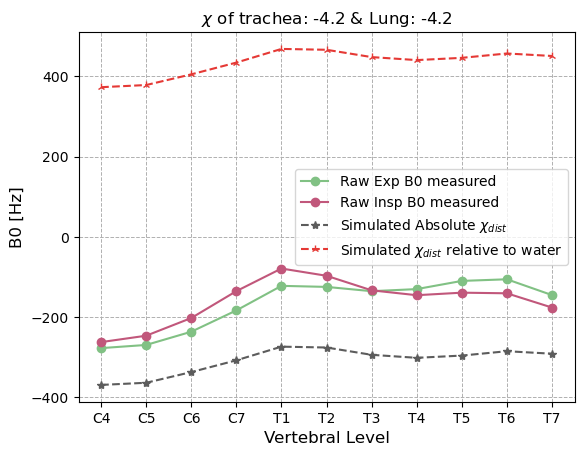

In [19]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
# db0_035:
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, abs_ref_fm_Hz_data, marker = '*', linestyle = '--', label = r"Simulated Absolute $\chi_{dist}$", color = "#5C5C5C")
plt.plot(vertebrae_levels, ref_h20_fm_Hz_data, marker = '2', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to water", color = "#E53935")

plt.title("$\\chi$ of trachea: -4.2 & Lung: -4.2")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.tight_layout()


# Show the plot
plt.show()

# <span style="color:#EC407A"> n*pi correction and plotting </span> 

In [30]:
# n*pi correction?
n = 2
gamma = gamma_bar*2*np.pi
delta_TE_db035 = 5.2-3.27
freq_offset_npi = (central_freq_exp_35*n*np.pi)/(gamma*delta_TE_db035*1e-3*B0_used_scanner)
print(f"Frequency offset from a {n} pi wrap: ",freq_offset_npi," Hz")

Frequency offset from a 2 pi wrap:  518.1347150259068  Hz


In [31]:
two_pi_offset_corrected_exp = raw_exp_metrics + freq_offset_npi
two_pi_offset_corrected_insp = raw_insp_metrics + freq_offset_npi

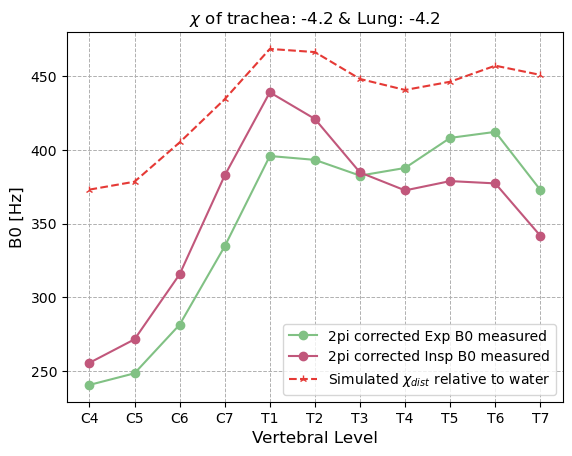

In [32]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
# db0_035:
plt.plot(vertebrae_levels, two_pi_offset_corrected_exp, marker = 'o', linestyle = '-', label = "2pi corrected Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, two_pi_offset_corrected_insp, marker = 'o', linestyle = '-', label = "2pi corrected Insp B0 measured", color = "#C1577B")
#plt.plot(vertebrae_levels, abs_ref_fm_Hz_data, marker = '*', linestyle = '--', label = r"Simulated Absolute $\chi_{dist}$", color = "#5C5C5C")
plt.plot(vertebrae_levels, ref_h20_fm_Hz_data, marker = '2', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to water", color = "#E53935")

plt.title("$\\chi$ of trachea: -4.2 & Lung: -4.2")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.tight_layout()


# Show the plot
plt.show()

# <span style="color:#8D6E63"> *All Subjects* </span> 

In [35]:
# Lets bring the other raw data to plot together:
raw_exp33_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/exp/raw_exp_metrics.csv"
raw_exp33_metrics_csv = pd.read_csv(raw_exp33_metrics_path)
raw_exp33_metrics= raw_exp33_metrics_csv['WA()'][::-1]

raw_insp33_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/insp/raw_insp_metrics.csv"
raw_insp33_metrics_df = pd.read_csv(raw_insp33_metrics_path)
raw_insp33_metrics = raw_insp33_metrics_df['WA()'][::-1]

raw_exp32_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv"
raw_exp32_metrics_csv = pd.read_csv(raw_exp32_B0_metrics_path)
raw_exp32_metrics= raw_exp32_metrics_csv['WA()'][::-1]

raw_insp32_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv"
raw_insp32_metrics_csv = pd.read_csv(raw_insp32_B0_metrics_path)
raw_insp32_metrics = raw_insp32_metrics_csv['WA()'][::-1]

In [36]:
# Fixing "n" pi wraps:
# Lets calculate the frequency offset from "n" pi wraps
central_freq33 = 123.249489 # MHz
gamma_bar = 42.58 # MHz per Tesla
n = 2
gamma = gamma_bar*2*np.pi # rd / (s.T)
deltaTE_33= 5.2-3.27
B0_used_scanner_33 = central_freq33 / gamma_bar

freq_offset_npi_33 = (central_freq33*n*np.pi)/(gamma*deltaTE_33*1e-3*B0_used_scanner_33)

print(f"Frequency offset from a {n} pi wrap: ",freq_offset_npi_33," Hz")

Frequency offset from a 2 pi wrap:  518.1347150259068  Hz


In [37]:
exp_corrected_metrics33 = raw_exp33_metrics - np.abs(freq_offset_npi_33)

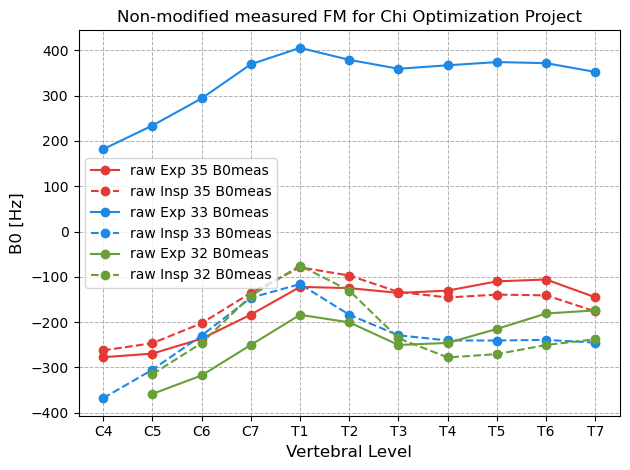

In [38]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "raw Exp 35 B0meas", color = "#E53935")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '--', label = "raw Insp 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, raw_exp33_metrics, marker = 'o', linestyle = '-', label = "raw Exp 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_insp33_metrics, marker = 'o', linestyle = '--', label = "raw Insp 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, raw_exp32_metrics, marker = 'o', linestyle = '-', label = "raw Exp 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_insp32_metrics, marker = 'o', linestyle = '--', label = "raw Insp 32 B0meas", color = "#689F38")

plt.title("Non-modified measured FM for Chi Optimization Project")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

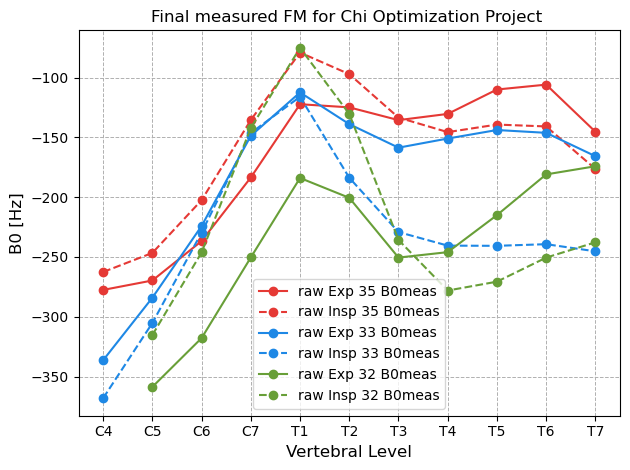

In [31]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "raw Exp 35 B0meas", color = "#E53935")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '--', label = "raw Insp 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, exp_corrected_metrics33, marker = 'o', linestyle = '-', label = "raw Exp 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_insp33_metrics, marker = 'o', linestyle = '--', label = "raw Insp 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, raw_exp32_metrics, marker = 'o', linestyle = '-', label = "raw Exp 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_insp32_metrics, marker = 'o', linestyle = '--', label = "raw Insp 32 B0meas", color = "#689F38")

plt.title("Final measured FM for Chi Optimization Project ")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#C28AD1"> Average Insp and Exp all subjects </span> 

In [39]:
avg_measured_32 = (raw_exp32_metrics + raw_insp32_metrics)/2

avg_measured_33 = (exp_corrected_metrics33 + raw_insp33_metrics)/2

avg_measured_35 = (raw_exp_metrics + raw_insp_metrics)/2

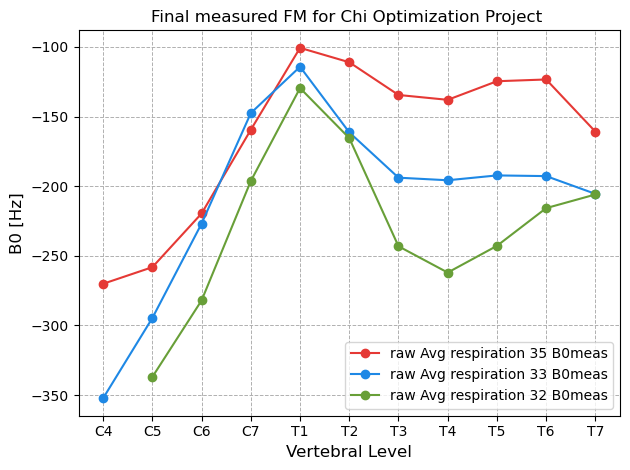

In [40]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, avg_measured_35, marker = 'o', linestyle = '-', label = "raw Avg respiration 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, avg_measured_33, marker = 'o', linestyle = '-', label = "raw Avg respiration 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, avg_measured_32, marker = 'o', linestyle = '-', label = "raw Avg respiration 32 B0meas", color = "#689F38")

plt.title("Final measured FM for Chi Optimization Project ")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#bf3d79"> Loading simulations </span> </br>
These are simulations that assume that $\chi$ trachea and lungs are equal to -4.2 ppm


In [41]:
path_to_ref_zero_fm33_Hz = r"E:\msc_data\ismrm_2025\dB0_033_dup1\fm\sim/raw_sim_fm_ref_zero_Hz.csv"
path_to_ref_zero_fm32_Hz = r"E:\msc_data\ismrm_2025\db0_032\fm\sim/raw_sim_fm_ref_zero_Hz.csv"

central_freq_scan33 = 123.249489 # MHz
central_freq_scan32 = 123.249521 # MHz

In [42]:
raw_sim_fm33_ref_zero_Hz_csv = pd.read_csv(path_to_ref_zero_fm33_Hz)
raw_sim_fm33_ref_zero_Hz_data = raw_sim_fm33_ref_zero_Hz_csv["WA()"]

raw_sim_fm32_ref_zero_Hz_csv = pd.read_csv(path_to_ref_zero_fm32_Hz)
raw_sim_fm32_ref_zero_Hz_data = raw_sim_fm32_ref_zero_Hz_csv["WA()"]


In [43]:
raw_sim_fm33_ref_zero_Hz_data

0    -441.225387
1    -430.529217
2    -403.820432
3    -369.662811
4    -359.669588
5    -386.808811
6    -401.979587
7    -396.963986
8    -389.762675
9    -397.040960
10   -399.648116
Name: WA(), dtype: float64

In [44]:
raw_sim_fm32_ref_zero_Hz_data

0   -391.598143
1   -332.189663
2   -246.536959
3   -211.086936
4   -221.311394
5   -222.766399
6   -202.743319
7   -178.068501
8   -164.932542
9   -176.421745
Name: WA(), dtype: float64

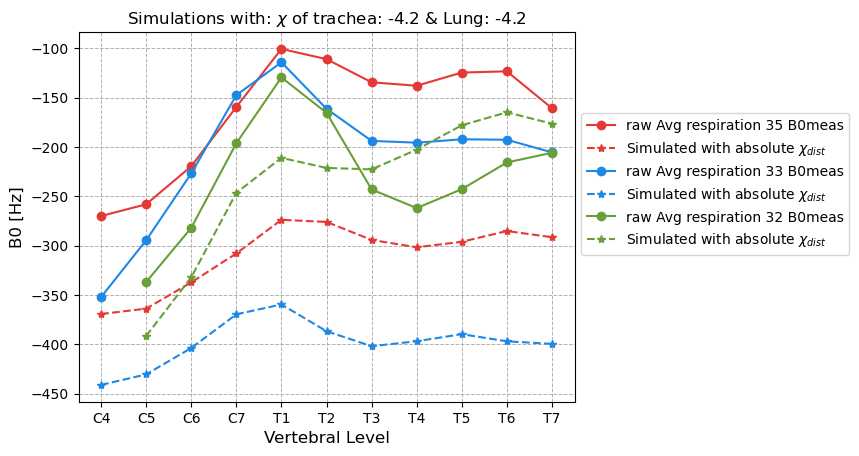

In [46]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, avg_measured_35, marker = 'o', linestyle = '-', label = "raw Avg respiration 35 B0meas", color = "#E53935")
plt.plot(vertebrae_levels, abs_ref_fm_Hz_data, marker = '*', linestyle = '--', label = r"Simulated with absolute $\chi_{dist}$", color = "#E53935")

# db0_033:
plt.plot(vertebrae_levels, avg_measured_33, marker = 'o', linestyle = '-', label = "raw Avg respiration 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_sim_fm33_ref_zero_Hz_data, marker = '*', linestyle = '--', label = r"Simulated with absolute $\chi_{dist}$ ", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, avg_measured_32, marker = 'o', linestyle = '-', label = "raw Avg respiration 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_sim_fm32_ref_zero_Hz_data, marker = '*', linestyle = '--', label = r"Simulated with absolute $\chi_{dist}$ ", color = "#689F38")
 
plt.title("Simulations with: $\\chi$ of trachea: -4.2 & Lung: -4.2")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.8))

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.tight_layout()


# Show the plot
plt.show()